# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

In [47]:
# selecting top few rows from dataframe
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
#summary info of dataframe 
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


**Is the distribution of body temperatures normal?

If we need to know whether our distribution of body temperature is normal or not, the first step will be plotting a histogram.

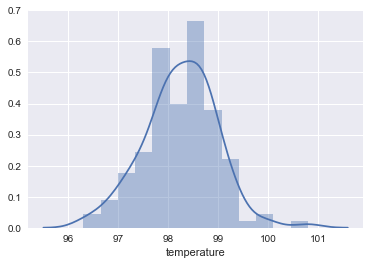

In [7]:
body_temperature = df['temperature']
sns.distplot(body_temperature)

From this graph, we can see more datapoints near the median and less datapoints at the end.

Now we will use a normal distribution test from SciPy.

Our hypothesis is: The distribution of temperatures are normal.
Our null hypothesis: The distribution of temperatures are not normal.

In [8]:
stats.normaltest(body_temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

Since our p-value > 0.05, we can reject the null hypothesis with confidence
We can conclude that the body temperature **normal distributed**.

**Is the sample size large?

In [13]:
df.shape

(130, 3)

Is 130 people adequate for a sample size? Since we don't have the population ready, we can redirect our approach into confidence levels and margin of error.
For example, it's desirable to have a 95% confidence rate ± 5% as a margin of error.
For this to work we would need a minimum sample size to be 95 ± 5% confident.


In [76]:
def min_sample_size(margin_of_error, z_score):
    stdev = 0.5
    x = (z_score**2) * (stdev) * (1-stdev)
    y = margin_of_error**2
    min_sample_size = x / y
    print("Minimum sample size: ", '%.0f' % min_sample_size)

In [78]:
min_sample_size(0.05, 1.96)

Minimum sample size:  384


As actual sample size is 130
So assuming that our population is at least 1 million people, we would need at least 384 respondants to be 95 ± 5% confident.
However, we only have 130 respondants. Thus, our sample size is too small for our desired parameters.
Let's change our standards to 90 ± 10% confident.

In [79]:
min_sample_size(0.10, 1.65)

Minimum sample size:  68


Since the minimum sample size for 90 ± 10% confidence is at least 68 respondance for 1 million people, we can say that our sample size is adequate.

**Are the observations independent?

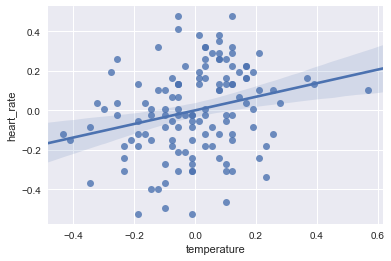

In [70]:
# Normalizing data for comparison

df_th = df[["temperature", "heart_rate"]]
df_norm = (df_th - df_th.mean()) / (df_th.max() - df_th.min())

sns.regplot(df_norm['temperature'], df_norm['heart_rate'])

From the above graph, data points do not follow a trend. Thus, we can conclude that the observations are independent due to high heart rates being independent to high temperatures.

**Is the true population mean really 98.6 degrees F?

Since we are assuming the population mean to be 98.6 degrees F, we can use a one sample t-test to see if there is a significant difference between 98.6 degrees F and the mean for this data set.

Null Hypothesis: The population mean is 98.6 degrees F. [no difference in mean]
Alternative Hypothesis: The population mean is less than 98.6 degrees F. [difference in mean]

Since our p-value is less than 0.01, we can reject our null hypothesis with confidence.

In [60]:
stats.ttest_1samp(df['temperature'], popmean=98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

**At what temperature should we consider someone's temperature to be "abnormal"?


Since we are already getting an idea of the average temperatures for men and women, we can make an inference on when body temperature is getting abnormal. Rather than taking a biological approach, we are going to take a look at confidence intervals and margin of error. Here, we are aiming for 95% confidence.

Thus, we can say that we are 95% confident that: the human body temperature is 98.25 ± 1.44 degrees F or is between 96.81 to 99.68 degrees F. 

Anything outside those intervals is considered statistically "abnormal".

In [61]:
df.temperature.mean()

98.24923076923078

In [64]:
#CI(confidence interval)
CI_low, CI_high = stats.norm.interval(0.95, loc=df.temperature.mean(), scale=df.temperature.std())
CI_low, CI_high

(96.812218185403111, 99.686243353058444)

In [65]:
margin_of_error = float(df.temperature.mean() - CI_low)
margin_of_error

1.4370125838276664

**Is there at difference between male and female body temperature?

We will try a 2-sample t-test to see if male body temperatures are significantly different compared to female body temperatures.

Null Hypothesis: Males and females have the same body temperature. [no difference in mean]
Alternative Hypothesis: Males and females have difference body temperatures. [difference in mean]

Since our p-value is less than 0.05, we can reject our null hypothesis with 95% confidence.

In [68]:
temp_gender_df = df[['temperature', 'gender']]
male_temp = temp_gender_df[temp_gender_df.gender=='M']
female_temp = temp_gender_df[temp_gender_df.gender=='F']

#Calculates the T-test for the means of *two independent* samples of scores.
stats.ttest_ind(male_temp['temperature'],female_temp['temperature'])

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

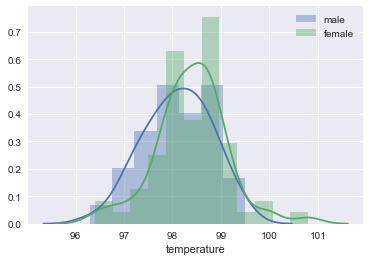

In [69]:
sns.distplot(male_temp['temperature'], label='male')
sns.distplot(female_temp['temperature'], label='female')
plt.legend()

**Conclusion

**What is the True Normal Human Body Temperature?

The true body normal human body temperature is 98.25 ± 1.44 degrees F with 95% confidence.

**Is the distribution of body temperatures normal?

For this dataset, yes.

**Is the sample size large?

Assuming that the population size is about 1 million people, we can say that it is with 90% confidence.

**Are the observations independent?

Yes, body temperatures are independent to heartrate.

**Is the true population mean really 98.6 degrees F?

No. The true population is less than 98.6 degrees F with 99% confidence.

**At what temperature should we consider someone's temperature to be "abnormal"?

Statistically, anything above or below 96.81 to 99.68 degrees F at 95% confidence.

**Is there at difference between male and female body temperatur

Yes. Females are warmer than males with 95% confidence. 